# Train GTAV Self-Driving Model

In [12]:
# Import relevant packages
import random
import ntpath

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as npimg  
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import torch
import torch.nn as nn
from torch.optim import Adam

In [2]:
# Establish fixed values
WIDTH = 160
HEIGHT = 120

In [4]:
# Load Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

train_data1 = np.load('drive/My Drive/training_data_angle/training_data-1.npy', allow_pickle=True)
train_data2 = np.load('drive/My Drive/training_data_angle/training_data-2.npy', allow_pickle=True)
train_data3 = np.load('drive/My Drive/training_data_angle/training_data-3.npy', allow_pickle=True)
train_data4 = np.load('drive/My Drive/training_data_angle/training_data-4.npy', allow_pickle=True)
train_data5 = np.load('drive/My Drive/training_data_angle/training_data-5.npy', allow_pickle=True)
train_data6 = np.load('drive/My Drive/training_data_angle/training_data-6.npy', allow_pickle=True)
train_data7 = np.load('drive/My Drive/training_data_angle/training_data-7.npy', allow_pickle=True)
train_data8 = np.load('drive/My Drive/training_data_angle/training_data-8.npy', allow_pickle=True)
train_data9 = np.load('drive/My Drive/training_data_angle/training_data-9.npy', allow_pickle=True)
train_data10 = np.load('drive/My Drive/training_data_angle/training_data-10.npy', allow_pickle=True)
train_data11 = np.load('drive/My Drive/training_data_angle/training_data-11.npy', allow_pickle=True)
train_data12 = np.load('drive/My Drive/training_data_angle/training_data-12.npy', allow_pickle=True)
train_data13 = np.load('drive/My Drive/training_data_angle/training_data-13.npy', allow_pickle=True)
train_data14 = np.load('drive/My Drive/training_data_angle/training_data-14.npy', allow_pickle=True)
train_data15 = np.load('drive/My Drive/training_data_angle/training_data-15.npy', allow_pickle=True)
train_data16 = np.load('drive/My Drive/training_data_angle/training_data-16.npy', allow_pickle=True)
train_data17 = np.load('drive/My Drive/training_data_angle/training_data-17.npy', allow_pickle=True)
train_data18 = np.load('drive/My Drive/training_data_angle/training_data-18.npy', allow_pickle=True)
train_data19 = np.load('drive/My Drive/training_data_angle/training_data-19.npy', allow_pickle=True)
train_data20 = np.load('drive/My Drive/training_data_angle/training_data-20.npy', allow_pickle=True)
train_data21 = np.load('drive/My Drive/training_data_angle/training_data-21.npy', allow_pickle=True)
train_data22 = np.load('drive/My Drive/training_data_angle/training_data-22.npy', allow_pickle=True)
train_data23 = np.load('drive/My Drive/training_data_angle/training_data-23.npy', allow_pickle=True)
train_data24 = np.load('drive/My Drive/training_data_angle/training_data-24.npy', allow_pickle=True)
train_data25 = np.load('drive/My Drive/training_data_angle/training_data-25.npy', allow_pickle=True)


train_data =  np.concatenate((train_data1, train_data2, train_data3, train_data4, train_data5, train_data6, train_data7,
                             train_data8, train_data9, train_data10, train_data11, train_data12, train_data13, train_data14,
                             train_data15, train_data16, train_data17, train_data18, train_data19, train_data20, train_data21,
                             train_data22, train_data23, train_data24, train_data25))

print ("Train Data: ", train_data.shape)

Mounted at /content/drive
Train Data:  (100000, 2)


In [5]:
# clear the array
train_data1 = []
train_data2 = []
train_data3 = []
train_data4 = []
train_data5 = []
train_data6 = []
train_data7 = []
train_data8 = []
train_data9 = []
train_data10 = []
train_data11 = []
train_data12 = []
train_data13 = []
train_data14 = []
train_data15 = []
train_data16 = []
train_data17 = []
train_data18 = []
train_data19 = []
train_data20 = []
train_data21 = []

In [6]:
# Separate data into steering and throttle 
steering = []
throttle = []
for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  
  choice = [steering_data, throttle]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

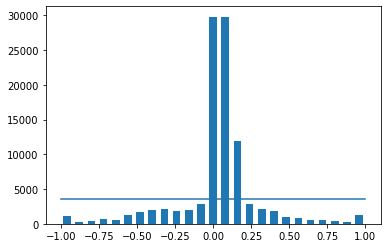

In [7]:
# Plot Unbalanced Steering Data
num_bins = 25
samples_per_bin = 3500
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [ ]:
# Plot Unbalanced throttle Data
num_bins = 25
samples_per_bin = 3500
hist, bins = np.histogram(throttle, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [8]:
# Balance the steering data
print ('total data', len(train_data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(steering)):
    if steering[i] >= bins[j] and steering[i]<=bins[j+1]:
      #print(i)
      list_.append(i) 
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print ('removed', len(remove_list))

print (np.max(remove_list))

train_data = np.delete(train_data, remove_list, axis=0)

print ('remaining:', len (train_data))

total data 100000
removed 60954
99996
remaining: 39046


In [9]:
# Separate balanced data into steering and throttle 
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

<BarContainer object of 25 artists>

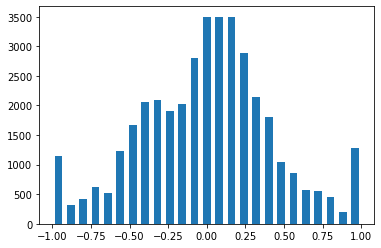

In [10]:
# Plot balanced Steering Data
num_bins = 25
samples_per_bin = 2000
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

<BarContainer object of 25 artists>

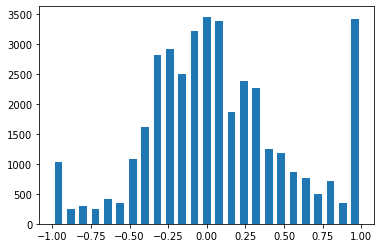

In [11]:
# Plot balanced throttle Data
num_bins = 25
samples_per_bin = 2000
hist, bins = np.histogram(throttle, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [13]:
# Function to flip the image and steering angle
def img_random_flip(image, choice):
  image = cv2.flip(image, 1)
  steering=choice[0]
  throttle=choice[1]
  steering = -steering
  new_choice = [steering, throttle]
  return image, new_choice

In [14]:
# Add augmented data to the dataset
temp_train_data = []
for data in train_data:
  image = data [0]
  choice = data [1]
  flipped_image, flipped_choice = img_random_flip(image, choice)
  temp_train_data.append([flipped_image, flipped_choice])

temp_train_data =np.array(temp_train_data)
train_data = np.concatenate((train_data,temp_train_data))


print ("New Size of Training Data:", len(train_data))
train_data = shuffle(train_data)

New Size of Training Data: 78092


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [15]:
# Separate artificially expanded data into steering and throttle 
train_data = shuffle(train_data)
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

<BarContainer object of 25 artists>

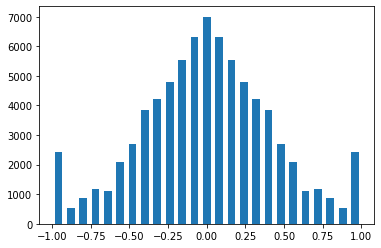

In [16]:
# Plot expanded-balanced Steering Data
num_bins = 25
samples_per_bin = 2000
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

<BarContainer object of 25 artists>

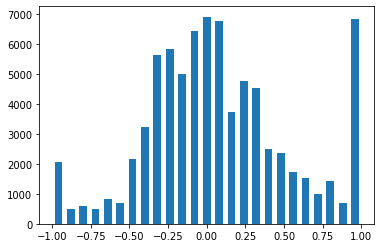

In [17]:
# Plot Throttle
hist, bins = np.histogram(throttle, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)

In [18]:
# Split the dataset
train = train_data[:-round(len(train_data)*0.20)] 
test = train_data[-round(len(train_data)*0.20):]
print("train: ", train.shape)
print("test: ", test.shape)


X = np.array([i[0] for i in train]).reshape(-1,WIDTH,HEIGHT,1)
Y = np.array([i[1] for i in train])

test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
test_y = np.array([i[1] for i in test])

train:  (62474, 2)
test:  (15618, 2)


In [19]:
# Image augmentation used to generalize the performance of the model
def zoom(image):
  zoom_img = iaa.Affine(scale = (1, 1.3))
  image = zoom_img.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

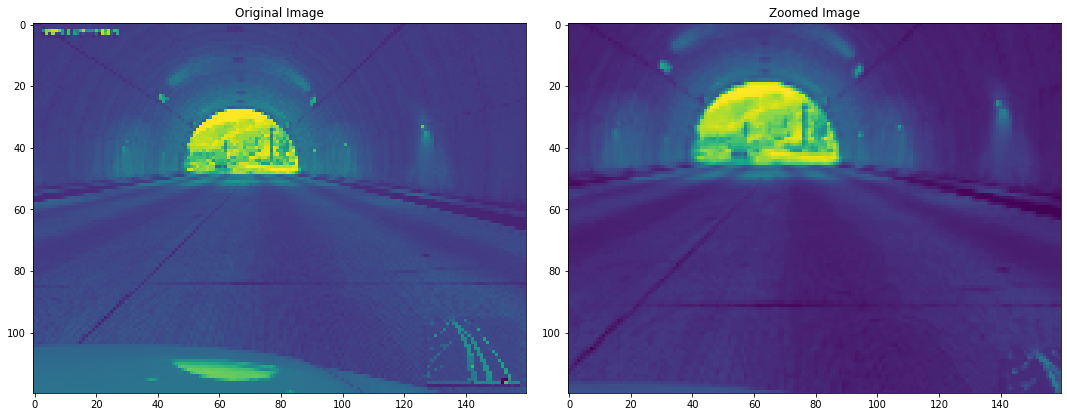

In [20]:
image, choice = train [random.randint(0,len(train)-1)]
zoomed_image = zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [21]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

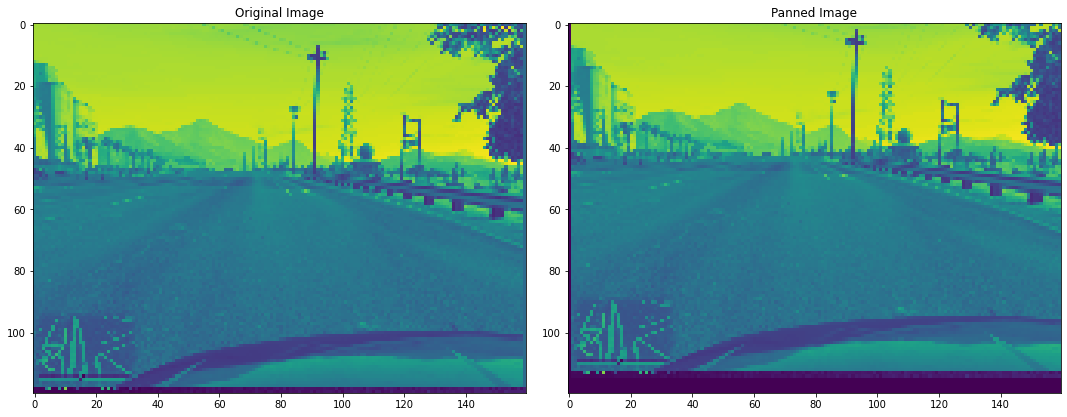

In [22]:
image, choice = train [random.randint(0,len(train)-1)]
#original_image = npimg.imread(image)
panned_image = pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [23]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'bright_image')

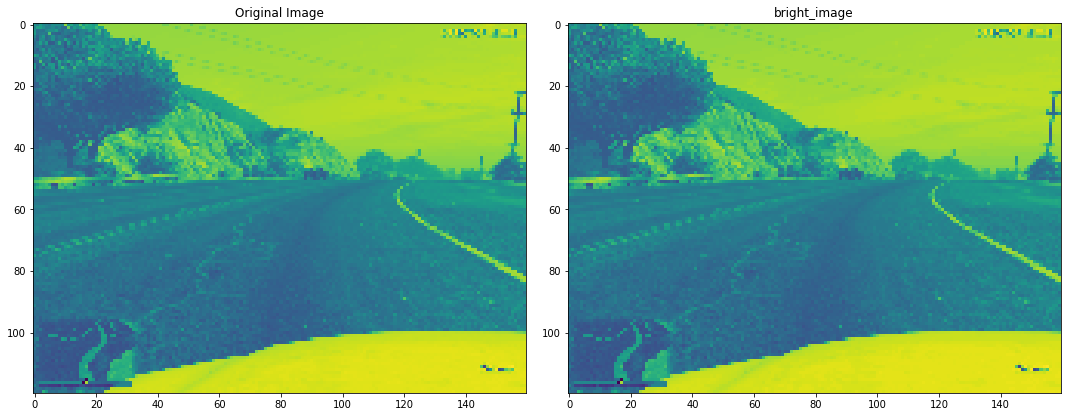

In [24]:
image, choice = train_data [random.randint(0,len(train_data)-1)]
bright_image = img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(bright_image)
axs[1].set_title('bright_image')

In [25]:
def img_random_flip(image, choice):
  image = cv2.flip(image, 1)
  steering=choice[0]
  throttle=choice[1]
  steering = -steering
  new_choice = [steering, throttle]
  return image, new_choice

actual steering angle =  -0.125457763671875
flipped steering angle =  0.125457763671875


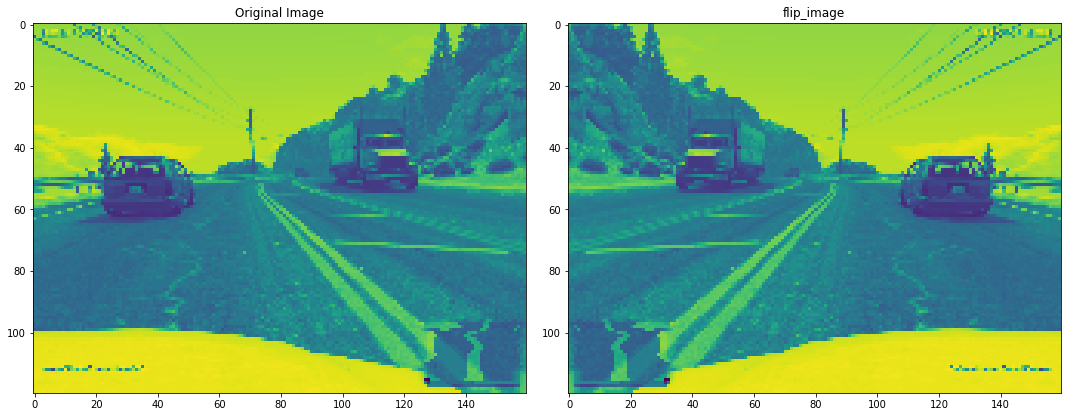

In [26]:
image, choice = train_data [random.randint(0,len(train_data)-1)]
flip_image, flip_choice = img_random_flip(image, choice)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(flip_image)
axs[1].set_title('flip_image')

print ("actual steering angle = ", choice [0])
print ("flipped steering angle = ", flip_choice [0])
#print (choice)
#print (flip_choice)

In [27]:
def random_augment(image, choice):
    #image = npimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, choice = img_random_flip(image, choice)
    
    return image, choice

(120, 160)


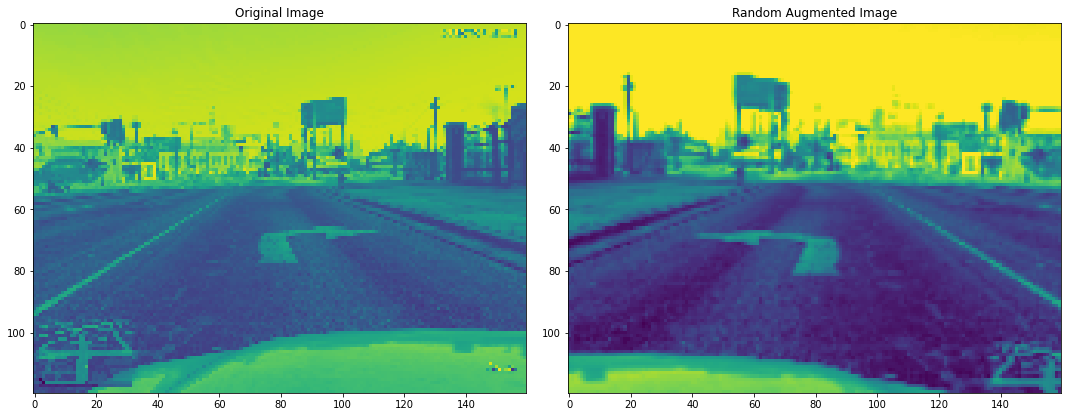

In [34]:
image, choice = train_data [random.randint(0,len(train_data)-1)]
random_augmented_image, augmented_choice = random_augment(image, choice)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image) #cmap='gray'
axs[0].set_title('Original Image')

axs[1].imshow(random_augmented_image) #cmap='gray'
axs[1].set_title('Random Augmented Image')

In [29]:
def batch_generator(train_data_to_generate, batch_size, istraining):
  while True:
    batch_img = []
    batch_ch = []

    for i in range(batch_size):
      random_index = random.randint(0, len(train_data_to_generate)-1)
      image, choice = train_data_to_generate[random_index]

      if istraining:
        im, ch= random_augment(image, choice)
        #ch = choice
      else:
        im = image
        ch = choice
      
      im = im.reshape(WIDTH,HEIGHT,1)

      batch_img.append(im)
      batch_ch.append(ch)
    yield (np.asarray(batch_img), np.asarray(batch_ch))

In [35]:
# Modified from NVIDIA PilotNet
model = nn.Sequential(
      # 1st layer
      nn.Conv2d(1, 24, kernel_size=(5,5), stride=(2,2)),
      nn.ELU(),
      # 2nd layer
      nn.Conv2d(24, 36, kernel_size=(5,5), stride=(2,2)),
      nn.ELU(),
      # 3rd layer
      nn.Conv2d(36, 48, kernel_size=(5,5), stride=(2,2)),
      nn.ELU(),
      # 4th layer
      nn.Conv2d(48, 64, kernel_size=(5,5)),
      nn.ELU(),
      # 5th layer
      nn.Conv2d(64, 64, kernel_size=(3,3)),
      nn.ELU(),

      # 1st dense layer
      nn.Flatten(),
      nn.Linear(6656, 100),
      nn.ELU(),
      #nn.Dropout(0.5)

      # 2nd dense layer
      nn.Linear(100, 50),
      nn.ELU(),
      #nn.Dropout(0.5)

      # 3rd dense layer
      nn.Linear(50, 10),
      nn.ELU(),
      #nn.Dropout(0.5)

      # Output
      nn.Linear(10, 2)
  )
print(model)

Sequential(
  (0): Conv2d(1, 24, kernel_size=(5, 5), stride=(2, 2))
  (1): ELU(alpha=1.0)
  (2): Conv2d(24, 36, kernel_size=(5, 5), stride=(2, 2))
  (3): ELU(alpha=1.0)
  (4): Conv2d(36, 48, kernel_size=(5, 5), stride=(2, 2))
  (5): ELU(alpha=1.0)
  (6): Conv2d(48, 64, kernel_size=(5, 5), stride=(1, 1))
  (7): ELU(alpha=1.0)
  (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (9): ELU(alpha=1.0)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=6656, out_features=100, bias=True)
  (12): ELU(alpha=1.0)
  (13): Linear(in_features=100, out_features=50, bias=True)
  (14): ELU(alpha=1.0)
  (15): Linear(in_features=50, out_features=10, bias=True)
  (16): ELU(alpha=1.0)
  (17): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
# Train model
optimizer = Adam(lr = 0.001)
Loss = nn.MSELoss()
epochs = 25

for i in range(1, epochs + 1):
    epoch_start_time = time.time()